# Importing libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing dataset

In [54]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [55]:
df.shape

(1000, 3)

# Plotting distribution

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

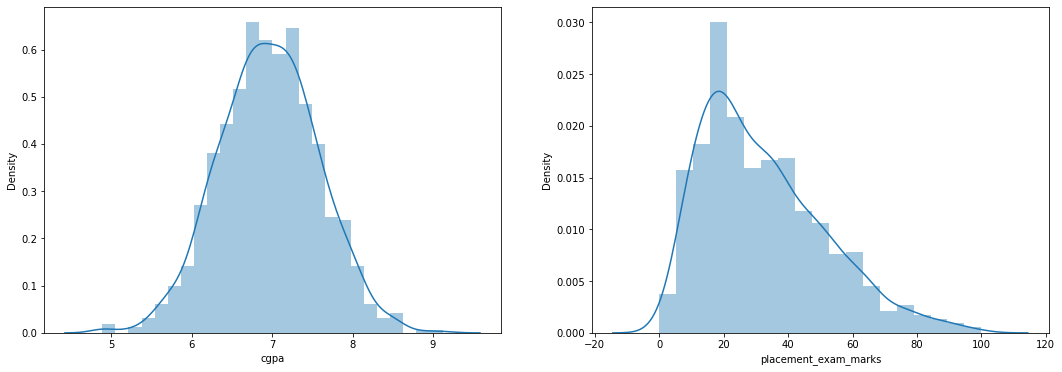

In [56]:
# Set the figure size for the plot
plt.figure(figsize=(18, 6))

# Create the first subplot on the left
plt.subplot(1, 2, 1)

# Plot the distribution of the 'cgpa' column using Seaborn
sns.distplot(df['cgpa'])


# Create the second subplot on the right
plt.subplot(1, 2, 2)

# Plot the distribution of the 'placement_exam_marks' column using Seaborn
sns.distplot(df['placement_exam_marks'])

In [57]:
# Calculate the skewness of the 'cgpa' column in the DataFrame 'df'
df['cgpa'].skew()

-0.014529938929314918

In [58]:
# Calculate the skewness of the 'placement_exam_marks' column in the DataFrame 'df'
df['placement_exam_marks'].skew()

0.8356419499466834

As observed in the plots and confirmed by the skewness function, the 'placement_exam_marks' column exhibits a skewed distribution, while the 'cgpa' column is normally distributed. Since the IQR technique is most effective when applied to skewed data, we will focus solely on the 'placement_exam_marks' column.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

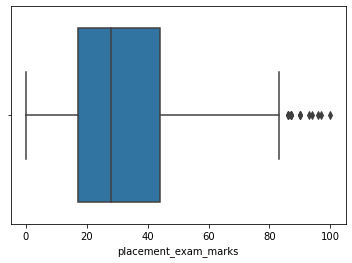

In [59]:
# Create a box plot for the 'placement_exam_marks' column using Seaborn
sns.boxplot(df['placement_exam_marks'])

In [60]:
# Generate descriptive statistics for the 'placement_exam_marks' column in the DataFrame 'df'
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [61]:
# Calculate the 25th percentile (first quartile) for the 'placement_exam_marks' column
percentile_25 = df['placement_exam_marks'].quantile(0.25)

# Print the value of the 25th percentile
print('Percentile_25:', percentile_25)


# Calculate the 75th percentile (third quartile) for the 'placement_exam_marks' column
percentile_75 = df['placement_exam_marks'].quantile(0.75)

# Print the value of the 75th percentile
print('Percentile_75:', percentile_75)

Percentile_25: 17.0
Percentile_75: 44.0


In [62]:
# Calculate the Interquartile Range (IQR) for the 'placement_exam_marks' column
# IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3)
IQR = percentile_75 - percentile_25

# Display the calculated IQR
IQR

27.0

In [63]:
# Calculate the lower limit for potential outliers using the IQR method
# Lower limit is defined as Q1 (25th percentile) minus 1.5 times the IQR
lower_limit = percentile_25 - 1.5 * IQR

# Print the calculated lower limit
print('Lower limit:', lower_limit)


# Calculate the upper limit for potential outliers using the IQR method
# Upper limit is defined as Q3 (75th percentile) plus 1.5 times the IQR
upper_limit = percentile_75 + 1.5 * IQR

# Print the calculated upper limit
print('Upper limit:', upper_limit)

Lower limit: -23.5
Upper limit: 84.5


# Finding Outliers

In [64]:
# Identify potential outliers in the 'placement_exam_marks' column based on the lower and upper limits
outliers = df[(df['placement_exam_marks'] < lower_limit) | (df['placement_exam_marks'] > upper_limit)]

# Display the DataFrame containing the identified potential outliers
outliers

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Trimming

In [65]:
# Create a new DataFrame 'df1' containing data points within the lower and upper limits for the 'placement_exam_marks' column
df1 = df[(df['placement_exam_marks'] > lower_limit) & (df['placement_exam_marks'] < upper_limit)]

# Display the first few rows of the DataFrame 'df1'
df1.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [66]:
df1.shape

(985, 3)

In [67]:
# Generate descriptive statistics for the 'placement_exam_marks' column in the DataFrame 'df'
df1['placement_exam_marks'].describe()

count    985.000000
mean      31.339086
std       17.857633
min        0.000000
25%       17.000000
50%       28.000000
75%       43.000000
max       83.000000
Name: placement_exam_marks, dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

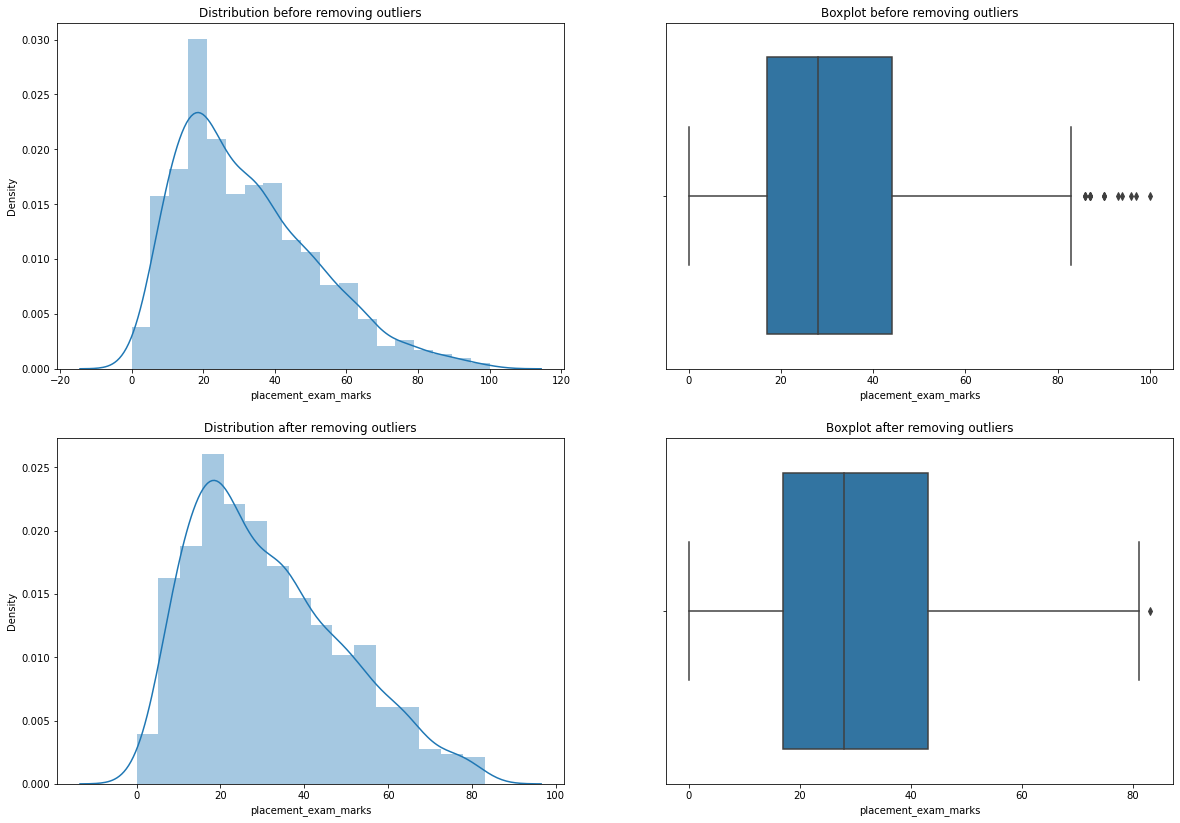

In [68]:
# Set the figure size for the plot
plt.figure(figsize=(20, 14))

# Create the first subplot in the top-left position
plt.subplot(2, 2, 1)

# Plot the distribution of 'placement_exam_marks' before removing outliers using Seaborn
sns.distplot(df['placement_exam_marks'])
plt.title('Distribution before removing outliers')

# Create the second subplot in the top-right position
plt.subplot(2, 2, 2)

# Create a box plot of 'placement_exam_marks' before removing outliers using Seaborn
sns.boxplot(df['placement_exam_marks'])
plt.title('Boxplot before removing outliers')

# Create the third subplot in the bottom-left position
plt.subplot(2, 2, 3)

# Plot the distribution of 'placement_exam_marks' after removing outliers using Seaborn
sns.distplot(df1['placement_exam_marks'])
plt.title('Distribution after removing outliers')

# Create the fourth subplot in the bottom-right position
plt.subplot(2, 2, 4)

# Create a box plot of 'placement_exam_marks' after removing outliers using Seaborn
sns.boxplot(df1['placement_exam_marks'])
plt.title('Boxplot after removing outliers')

# Display the plots
plt.show()

# Capping

In [69]:
# Create a copy of the original DataFrame 'df' to work with a new DataFrame 'df2'
df2 = df.copy()

# Use NumPy's 'np.where' to replace 'placement_exam_marks' values that are outside the lower and upper limits
# Values above the upper limit are replaced with the upper limit, 
# values below the lower limit are replaced with the lower limit, 
# and values within the limits remain unchanged

df2['placement_exam_marks'] = np.where(
    df2['placement_exam_marks'] > upper_limit,  # Condition for values above the upper limit
    upper_limit,                               # Value to replace if the condition is met
    np.where(
        df2['placement_exam_marks'] < lower_limit,  # Condition for values below the lower limit
        lower_limit,                               # Value to replace if the condition is met
        df2['placement_exam_marks']                 # Value to keep if neither condition is met
    )
)


In [70]:
df2.shape

(1000, 3)

In [71]:
# Generate descriptive statistics for the 'placement_exam_marks' column in the DataFrame 'df'
df2['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

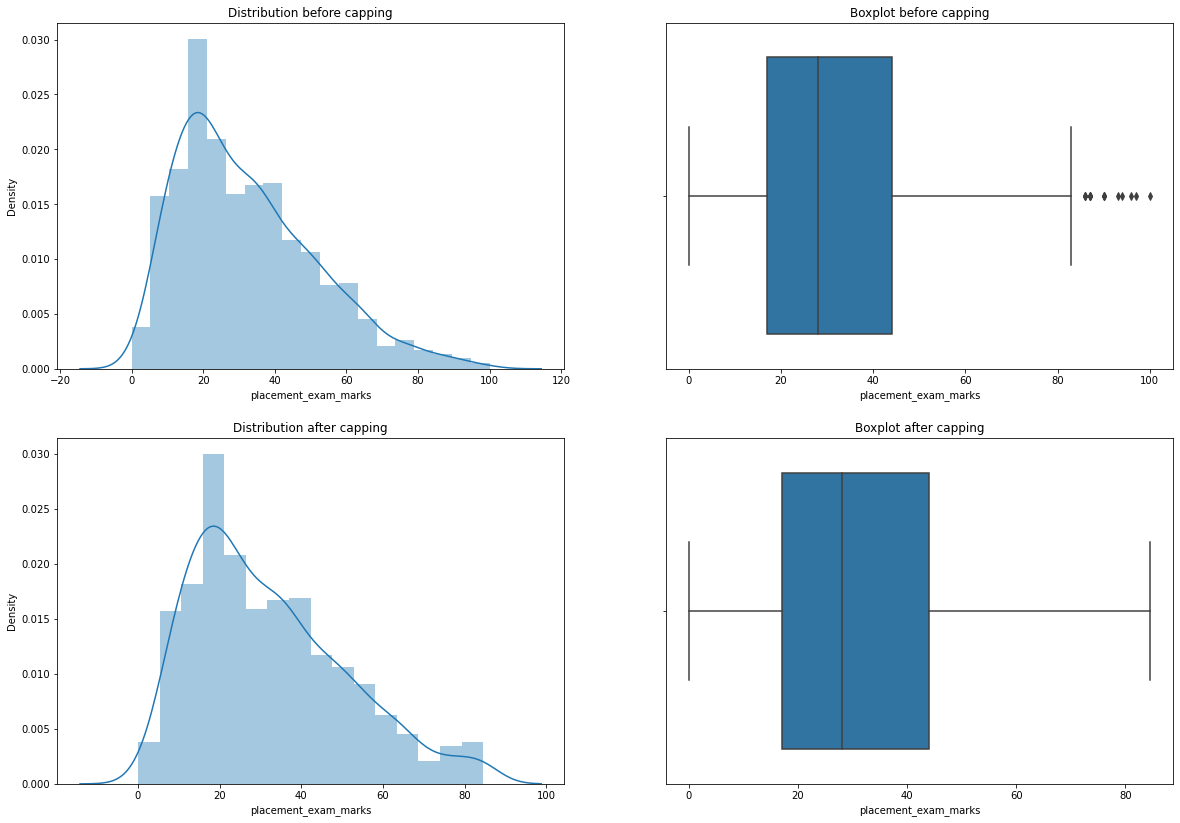

In [72]:
# Set the figure size for the plot
plt.figure(figsize=(20, 14))

# Create the first subplot in the top-left position
plt.subplot(2, 2, 1)

# Plot the distribution of 'placement_exam_marks' before capping using Seaborn
sns.distplot(df['placement_exam_marks'])
plt.title('Distribution before capping')

# Create the second subplot in the top-right position
plt.subplot(2, 2, 2)

# Create a box plot of 'placement_exam_marks' before capping using Seaborn
sns.boxplot(df['placement_exam_marks'])
plt.title('Boxplot before capping')

# Create the third subplot in the bottom-left position
plt.subplot(2, 2, 3)

# Plot the distribution of 'placement_exam_marks' after capping using Seaborn
sns.distplot(df2['placement_exam_marks'])
plt.title('Distribution after capping')

# Create the fourth subplot in the bottom-right position
plt.subplot(2, 2, 4)

# Create a box plot of 'placement_exam_marks' after capping using Seaborn
sns.boxplot(df2['placement_exam_marks'])
plt.title('Boxplot after capping')

# Display the plots
plt.show()